# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Problem Statement

Perform customer segmentation using bank data into distinct categories based on their behavioral patterns

## Learning Objectives

At the end of the experiment, you will be able to:

* Understand clustering
* Find groups or clusters using K-means algorithm
* Visualize the high-dimensional data to low-dimensional data (2D) by applying t-SNE algorithm

In [ ]:
#@title  Mini Hackathon Walkthrough
from IPython.display import HTML

HTML("""<video width="854" height="480" controls>
  <source src="https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Walkthrough/Customer_Segmentation.mp4" type="video/mp4">
</video>
""")

## Domain Information

- **Customer segmentation** refers to the process of dividing a set of potential customers into groups (or segments) based on shared attributes, interests, and behaviors.
- One of the key pain points for bank marketing team is to know their customers and identify their needs.
- For this mini-hackathon, we will use the popular **K-Means clustering** algorithm to segment customers based on their behavior from the bank data. The basic concept is that consumers who share common traits would respond to marketing communication in a similar way so that the bank marketing team can reach out to each group in a relevant and effective way.

## Dataset

### Description

The dataset chosen for this mini hackathon is the behavior of customers in the bank for 6 months, this dataset is made up of 13 features.

**Attribute Information**

- **CUSTID:** Identification of Credit Cardholder
- **BALANCE:** Balance amount left in customer's account to make purchases
- **PURCHASES:** Amount of purchases made from the account
- **INSTALLMENTS_PURCHASES:** Amount of purchase done in installment
- **CASH_ADVANCE:** Cash in advance given by the user
- **PURCHASES_FREQUENCY:** How frequently the Purchases are being made score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- **CASH_ADVANCE_FREQUENCY:** How frequently the cash in advance being paid
- **CASH_ADVANCE_TRX:** Number of Transactions made with "Cash in Advance"
- **CREDIT_LIMIT:** Limit of Credit Card for user
- **PAYMENTS:** Amount of Payment done by a user
- **MINIMUM_PAYMENTS:** Minimum amount of payments made by a user
- **PRC_FULL_PAYMENT:** Percent of full payment paid by a user
- **TENURE:** Tenure of credit card service for user

**Note:** The currency values mentioned above are in "dollars"

## Grading = 10 Marks

## Setup Steps

In [1]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()

notebook="U2_MH2_Customer_Segmentation" #name of the notebook
Answer = "This notebook is graded by mentors on the day of hackathon"
def setup():
    ipython.magic("sx wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Marketing_data_clustering.csv")
    print ("Setup completed successfully")
    return

setup()

Setup completed successfully


### Importing Required Packages

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE

## **Stage 1:** Data Pre-Processing (2 Marks)

- Replace the missing values in any other column appropriately with mean / median / mode.

  Hint: Use pandas [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) function to replace the missing values

- Perform correlation on the data features and remove highly correlated features from the data
  
  Hint: Use pandas [corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

- Drop any unwanted columns
  
  Hint: Use pandas [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

- Perform `StandardScaler()` on the data features
  
  Hint: Use Sklearns [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)



In [53]:
# Read the Marketing Data File into a dataframe
df_marketing_data = pd.read_csv("Marketing_data_clustering.csv")

In [54]:
# Print the data
df_marketing_data.head()

,CUST_ID,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,95.40,95.4,0.00000,0.166667,0.000000,0,1000.0,201.802084,139.509787,0.0,12
1,C10005,817.714335,16.00,0.0,0.00000,0.083333,0.000000,0,1200.0,678.334763,244.791237,0.0,12
2,C10008,1823.652743,436.20,436.2,0.00000,1.000000,0.000000,0,2300.0,679.065082,532.033990,0.0,12
3,C10009,1014.926473,861.49,200.0,0.00000,0.333333,0.000000,0,7000.0,688.278568,311.963409,0.0,12
4,C10015,2772.772734,0.00,0.0,346.81139,0.000000,0.083333,1,3000.0,805.647974,989.962866,0.0,12


In [55]:
# Check for null values
print(df_marketing_data.isnull().sum())

CUST_ID                    0
BALANCE                    0
PURCHASES                  0
INSTALLMENTS_PURCHASES     0
CASH_ADVANCE               0
PURCHASES_FREQUENCY        0
CASH_ADVANCE_FREQUENCY     0
CASH_ADVANCE_TRX           0
CREDIT_LIMIT               0
PAYMENTS                   0
MINIMUM_PAYMENTS          49
PRC_FULL_PAYMENT           0
TENURE                     0
dtype: int64


In [56]:
# Replace the missing values in any other column appropriately with mean / median / mode.
# Fill missing values with the mean column -> MINIMUM_PAYMENTS
df_marketing_data['MINIMUM_PAYMENTS'].fillna(df_marketing_data['MINIMUM_PAYMENTS'].mean(), inplace=True)

In [57]:
# Perform correlation on the data features and remove highly correlated features from the data

# 1. Calculate the correlation matrix
# Drop the 'CUST_ID' column before calculating correlations
# Drop the 'TENURE' column before calculating correlations, as it is same value (12) for all rows

df_marketing_data_numeric = df_marketing_data.drop(['CUST_ID', 'TENURE'], axis=1)

In [58]:
df_marketing_data_numeric

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,95.40,95.40,0.000000,0.166667,0.000000,0,1000.0,201.802084,139.509787,0.000000
1,817.714335,16.00,0.00,0.000000,0.083333,0.000000,0,1200.0,678.334763,244.791237,0.000000
2,1823.652743,436.20,436.20,0.000000,1.000000,0.000000,0,2300.0,679.065082,532.033990,0.000000
3,1014.926473,861.49,200.00,0.000000,0.333333,0.000000,0,7000.0,688.278568,311.963409,0.000000
4,2772.772734,0.00,0.00,346.811390,0.000000,0.083333,1,3000.0,805.647974,989.962866,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2989,981.286008,1370.00,0.00,0.000000,0.083333,0.000000,0,1400.0,596.685481,451.584847,0.000000
2990,87.026009,605.52,605.52,0.000000,1.000000,0.000000,0,1500.0,511.637312,175.012705,0.000000
2991,16.428326,441.50,316.80,0.000000,1.000000,0.000000,0,1000.0,482.547848,91.328536,0.333333
2992,67.377243,295.00,295.00,0.000000,0.500000,0.000000,0,1000.0,245.689379,167.126034,0.300000


In [59]:
# Find the correlation matrix
correlation_matrix = df_marketing_data_numeric.corr()

In [60]:
# We care about the magnitude of correlation, not the direction and hence we take absolute value
correlation_matrix = correlation_matrix.abs()

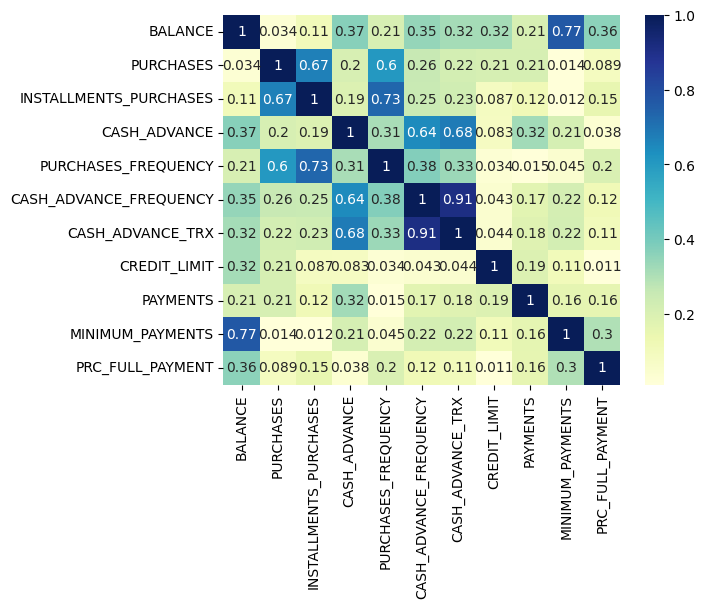

In [61]:
# Use seaborn to visualize the correlation matrix
dataplot = sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)

In [62]:
# 2. Select upper triangle of correlation matrix. As the correlation matrix is symmetric, so we only need to consider one half to avoid redundancy.
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# 3. Identify features to remove (correlated above a threshold). If a column has a correlation higher than the threshold with any other column, it's added to the to_drop list.
threshold = 0.70  # Adjust as needed
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# 4. Drop the highly correlated features
df_marketing_data_numeric = df_marketing_data_numeric.drop(to_drop, axis=1)

In [63]:
df_marketing_data_numeric

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,95.40,95.40,0.000000,0.000000,1000.0,201.802084,0.000000
1,817.714335,16.00,0.00,0.000000,0.000000,1200.0,678.334763,0.000000
2,1823.652743,436.20,436.20,0.000000,0.000000,2300.0,679.065082,0.000000
3,1014.926473,861.49,200.00,0.000000,0.000000,7000.0,688.278568,0.000000
4,2772.772734,0.00,0.00,346.811390,0.083333,3000.0,805.647974,0.000000
...,...,...,...,...,...,...,...,...
2989,981.286008,1370.00,0.00,0.000000,0.000000,1400.0,596.685481,0.000000
2990,87.026009,605.52,605.52,0.000000,0.000000,1500.0,511.637312,0.000000
2991,16.428326,441.50,316.80,0.000000,0.000000,1000.0,482.547848,0.333333
2992,67.377243,295.00,295.00,0.000000,0.000000,1000.0,245.689379,0.300000


In [64]:
# Perform StandardScaler() on the data features

X = df_marketing_data_numeric

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

In [65]:
X_scaled

array([[-1.13359969, -0.63261322, -0.31715131, ..., -0.90479325,
        -0.88170901, -0.41444166],
       [-0.37630323, -0.8116596 , -0.6893926 , ..., -0.82224017,
        -0.19700475, -0.41444166],
       [ 0.60436139,  0.13588811,  1.01261629, ..., -0.36819827,
        -0.19595539, -0.41444166],
       ...,
       [-1.15745725,  0.14783957,  0.5467294 , ..., -0.90479325,
        -0.47832047,  4.45174987],
       [-1.1077884 , -0.18251679,  0.46166798, ..., -0.90479325,
        -0.81864971,  3.9651351 ],
       [-0.87406153,  1.20272491,  1.26155753, ..., -0.90479325,
         0.18367824, -0.41444166]])

In [66]:
# Array to Dataframe
df_marketing_data_numeric = pd.DataFrame(X_scaled, index=X_scaled[:,0], columns=['BALANCE', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS', 'PRC_FULL_PAYMENT'])

In [67]:
df_marketing_data_numeric

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT
-1.133600,-1.133600,-0.632613,-0.317151,-0.641837,-0.795323,-0.904793,-0.881709,-0.414442
-0.376303,-0.376303,-0.811660,-0.689393,-0.641837,-0.795323,-0.822240,-0.197005,-0.414442
0.604361,0.604361,0.135888,1.012616,-0.641837,-0.795323,-0.368198,-0.195955,-0.414442
-0.184046,-0.184046,1.094914,0.090987,-0.641837,-0.795323,1.571799,-0.182717,-0.414442
1.529635,1.529635,-0.847739,-0.689393,-0.108188,-0.142048,-0.079263,-0.014075,-0.414442
...,...,...,...,...,...,...,...,...
-0.216841,-0.216841,2.241600,-0.689393,-0.641837,-0.795323,-0.739687,-0.314322,-0.414442
-1.088633,-1.088633,0.517703,1.673286,-0.641837,-0.795323,-0.698411,-0.436523,-0.414442
-1.157457,-1.157457,0.147840,0.546729,-0.641837,-0.795323,-0.904793,-0.478320,4.451750
-1.107788,-1.107788,-0.182517,0.461668,-0.641837,-0.795323,-0.904793,-0.818650,3.965135


## **Stage 2:** K Means (3 Marks)

- Find the right number of clusters to be chosen using the elbow method
  
- Perform K-Means on the chosen optimal number of clusters

  **Hint:** Refer to this [link](https://towardsdatascience.com/clustering-algorithms-for-customer-segmentation-af637c6830ac) for finding the k-clusters using elbow method and applying kmeans

In [68]:
# Find the right number of clusters to be chosen using the elbow method

# List to hold the sum of squared distances
sum_of_squared_distances = []

# Range of values for the number of clusters
K = range(1, 11)

# Compute k-means for each value of k and store the sum of squared distances
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_marketing_data_numeric)
    sum_of_squared_distances.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

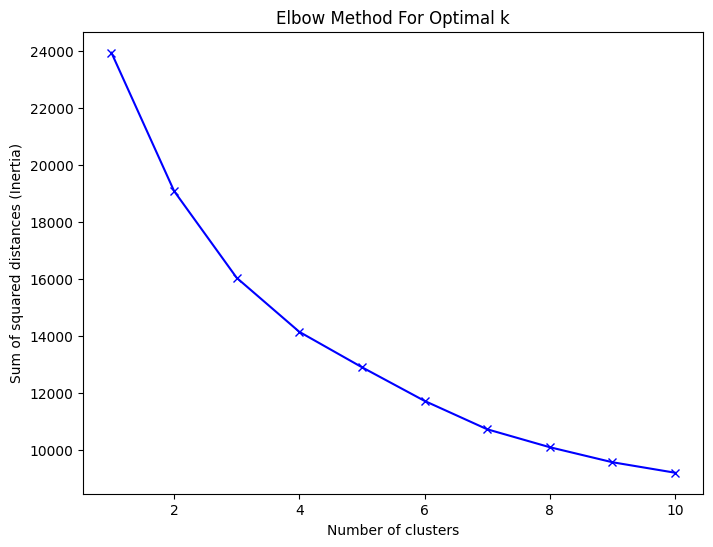

In [69]:
# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.show()

In [70]:
# Choosing the optimal number of clusters as 6
optimal_k = 6

# Perform K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
y_kmeans = kmeans.fit_predict(df_marketing_data_numeric)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


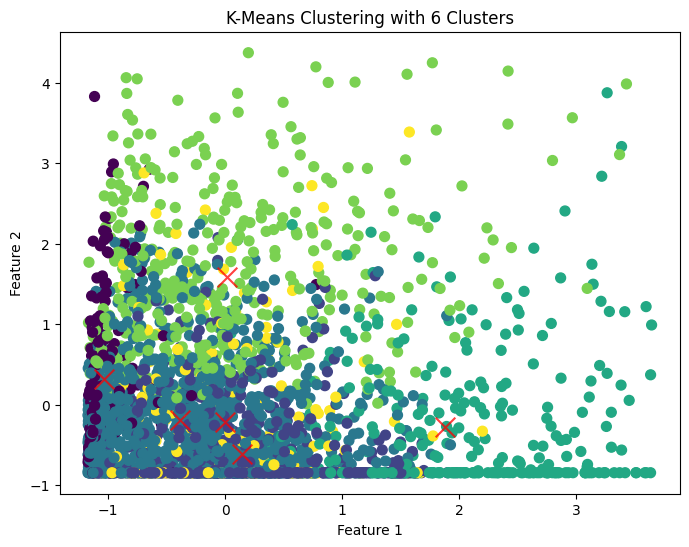

In [71]:
# Plot the clusters
plt.figure(figsize=(8, 6))

# Extract the values of the first and second columns as NumPy arrays
x_numpy = df_marketing_data_numeric.iloc[:, 0].values
y_numpy = df_marketing_data_numeric.iloc[:, 1].values

#plt.scatter(df_marketing_data_numeric[:, 0], df_marketing_data_numeric[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(x_numpy, y_numpy, c=y_kmeans, s=50, cmap='viridis')

# Plot the centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'K-Means Clustering with {optimal_k} Clusters')
plt.show()

## **Stage 3:** Apply **TSNE** with 2 components (n_components = 2) and visualize the clusters (3 Marks)

Hint: Use Sklearns [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

**Note:** Produce a visualization with distinctly isolated clusters and It is not necessary to plot the centroids



In [72]:
# Apply t-SNE for visualization
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(df_marketing_data_numeric)

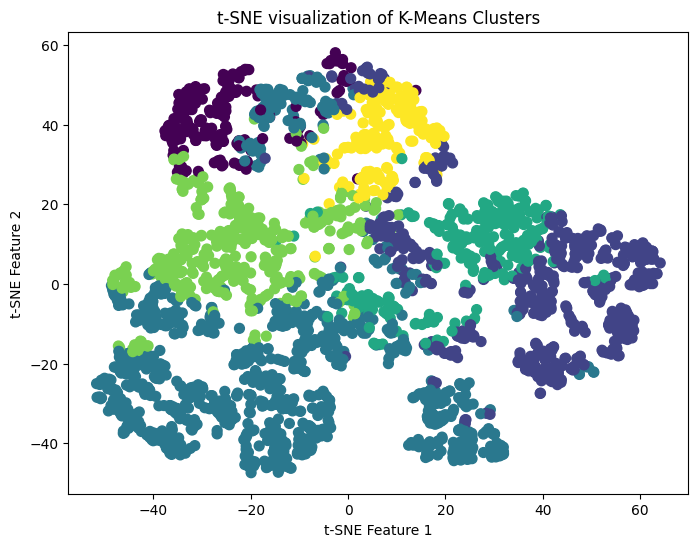

In [73]:
# Plot the t-SNE transformed data with clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.title('t-SNE visualization of K-Means Clusters')
plt.show()

## **Stage 4:** Insights for each cluster

#### **Stage 4(a)** (1 Mark):
- To understand the behavior of the customers from each cluster print the respective centroid point values obtained from the scaled dataframe
- Get the original representation of the scaled centroid points using [inverse_transformation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform) technique

In [74]:
# Get the centroids
centroids = kmeans.cluster_centers_

# Print the centroid values
print("Centroid values (scaled data):")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1}: {centroid}")

Centroid values (scaled data):
Cluster 1: [-1.03539856  0.32195221  0.47370543 -0.49228883 -0.57657873  0.21079388
 -0.08805291  2.87018747]
Cluster 2: [ 0.14236211 -0.61060729 -0.53314522  0.43188215  1.03950116 -0.44546438
 -0.26858524 -0.33160911]
Cluster 3: [-0.38564145 -0.18712774 -0.24440135 -0.56583992 -0.6159603  -0.23705602
 -0.44820367 -0.26827534]
Cluster 4: [ 1.88091037 -0.27934529 -0.42371445  1.3120774   0.79418103  1.18650748
  0.23350344 -0.41444166]
Cluster 5: [ 0.01475203  1.58691518  1.7056905  -0.40933848 -0.48401963  0.39137898
  0.35206951 -0.2109571 ]
Cluster 6: [-0.00525163 -0.21092899 -0.3180753   1.36720324  0.7435844  -0.07670932
  2.59799902  0.61901858]


In [75]:
# Get the original representation of the centroids
centroids_original = scaler.inverse_transform(centroids)

# Print the original centroid values
print("\nCentroid values (original data):")
for i, centroid in enumerate(centroids_original):
    print(f"Cluster {i+1}: {centroid}")


Centroid values (original data):
Cluster 1: [1.41632723e+02 5.18712081e+02 2.98085023e+02 9.71890892e+01
 2.79034480e-02 3.70271493e+03 7.54161818e+02 2.24996339e-01]
Cluster 2: [1.34974677e+03 1.05158765e+02 4.00439198e+01 6.97795413e+02
 2.34053535e-01 2.11280864e+03 6.28516989e+02 5.67401080e-03]
Cluster 3: [8.08135443e+02 2.92955223e+02 1.14044752e+02 4.93892228e+01
 2.28798640e-02 2.61771620e+03 5.03508195e+02 1.00123594e-02]
Cluster 4: [3.13310109e+03 2.52060382e+02 6.80894268e+01 1.26982250e+03
 2.02760054e-01 6.06656051e+03 9.77954945e+02 1.73472348e-17]
Cluster 5: [1.21884791e+03 1.07967322e+03 6.13824789e+02 1.51097406e+02
 3.97104554e-02 4.14021554e+03 1.06047321e+03 1.39386455e-02]
Cluster 6: [1.19832871e+03 2.82400309e+02 9.51631959e+01 1.30564805e+03
 1.96305856e-01 3.00618557e+03 2.62356965e+03 7.07917887e-02]


#### **Stage 4(b)** (1 Mark):
- Report your observations in the form of text, about the customers based on the centroid points

Hint: If require use [clustermap](https://seaborn.pydata.org/generated/seaborn.clustermap.html)

In [76]:
# Convert the centroid points to a DataFrame for better visualization
centroids_df = pd.DataFrame(centroids_original, columns=['BALANCE', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS', 'PRC_FULL_PAYMENT'])

In [77]:
centroids_df

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT
0,141.632723,518.712081,298.085023,97.189089,0.027903,3702.714932,754.161818,2.249963e-01
1,1349.746773,105.158765,40.043920,697.795413,0.234054,2112.808642,628.516989,5.674011e-03
2,808.135443,292.955223,114.044752,49.389223,0.022880,2617.716205,503.508195,1.001236e-02
3,3133.101089,252.060382,68.089427,1269.822500,0.202760,6066.560510,977.954945,1.734723e-17
4,1218.847912,1079.673216,613.824789,151.097406,0.039710,4140.215536,1060.473213,1.393865e-02
5,1198.328713,282.400309,95.163196,1305.648047,0.196306,3006.185567,2623.569653,7.079179e-02


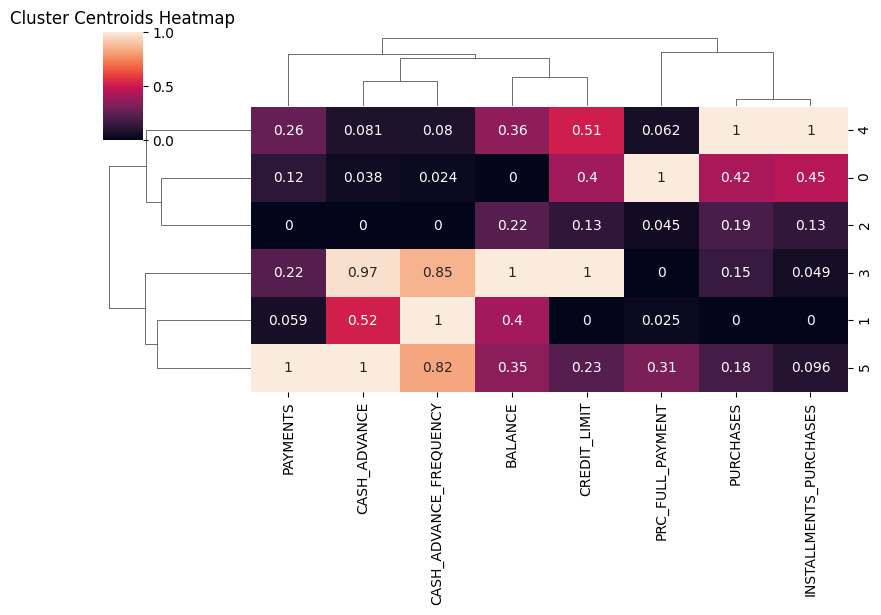

In [83]:
# Plotting the clustermap
#sns.clustermap(centroids_df, method='ward', cmap='viridis', standard_scale=1, figsize=(10, 8))

#sns.clustermap(centroids_df, row_cluster=False, figsize=(10, 8))
#sns.clustermap(centroids_df, z_score=0, cmap="vlag", center=0)
sns.clustermap(centroids_df, annot=True, figsize=(8, 6), standard_scale = 1, metric = 'euclidean')

plt.title("Cluster Centroids Heatmap")
plt.show()

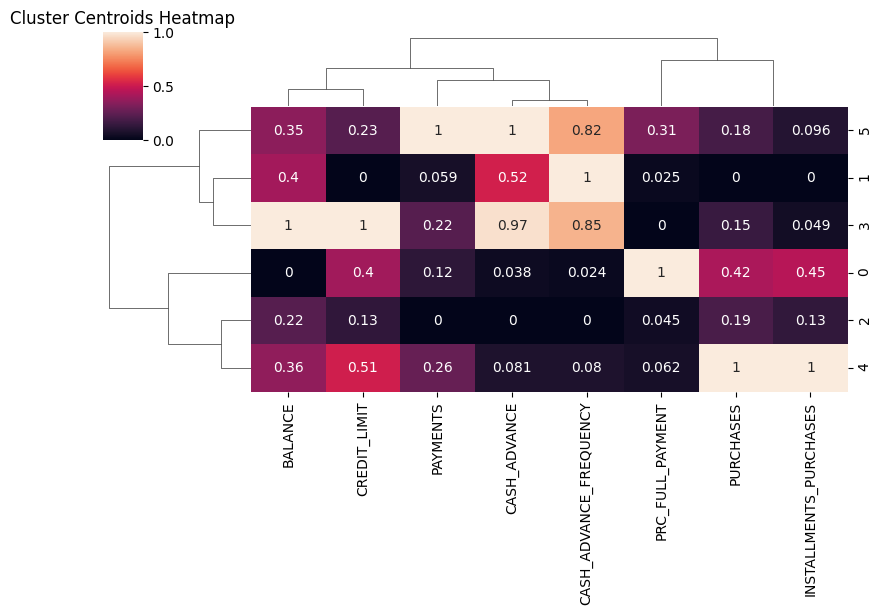

In [84]:
sns.clustermap(centroids_df, annot=True, figsize=(8, 6), standard_scale = 1, metric = 'correlation')

plt.title("Cluster Centroids Heatmap")
plt.show()

In [38]:
centroids_df

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1153.117453,293.017295,85.825942,1279.991407,0.219002,0.200886,2911.594203,2545.780294,7.290060e-02,12.0
1,796.967466,348.225742,116.238557,35.056023,0.447032,0.014330,2939.713408,525.567961,1.007898e-02,12.0
2,1240.562829,54.904282,14.245599,500.797164,0.059179,0.187967,1963.504611,562.666633,8.437169e-03,12.0
3,126.700721,527.023431,331.991765,70.532695,0.755310,0.021650,3689.950980,684.920576,2.293063e-01,12.0
4,2953.434735,219.027551,55.189796,1356.602220,0.193392,0.228377,5630.612245,930.370428,2.428613e-17,12.0
5,1202.638891,992.814722,595.602738,178.261958,0.845734,0.045139,3785.281385,1021.979637,1.364535e-02,12.0
